In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score 

## Workflow summary: 
- **EDA/preprocessing**: Handle missing values/invalid data types --> convert categorical features to object type and numerical features to int64 type <br>
- **Feature selection**: Train a preliminary model (decision tree regressor) and select top n features based on importance in predicting the target variable in_spotify_charts (song rank on Spotify)
- **Training model**: Train/test split on top n features --> train final model and evaluate with cross-validation
- **Assessing performance**: Measure model accuracy/variance captured with Mean Absolute Error (MAE) and R-squared metrics
- **Visualization**: Plot actual versus predicted rankings on scatter plot

In [2]:
spotify2023 = pd.read_csv('spotify-2023.csv', encoding='latin1')
spotify2023

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#### EDA/preprocessing

In [3]:
print(spotify2023.head())
print(spotify2023.info())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [4]:
print(spotify2023.shape)
print(spotify2023.columns)

(953, 24)
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [5]:
print(spotify2023.isnull().sum())
spotify2023.dropna(inplace=True)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [6]:
num_features = [
    'artist_count', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]
print(spotify2023[num_features].describe())

       artist_count  in_spotify_playlists  in_apple_playlists  \
count    817.000000            817.000000          817.000000   
mean       1.567931           4849.898409           60.161567   
std        0.876211           7741.126455           74.923594   
min        1.000000             31.000000            0.000000   
25%        1.000000            829.000000           12.000000   
50%        1.000000           2040.000000           32.000000   
75%        2.000000           4890.000000           78.000000   
max        8.000000          52898.000000          532.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       817.000000        817.000000  817.000000      817.000000   
mean         49.473684          2.451652  122.565483       67.391677   
std          49.570455          5.397024   28.174803       14.688458   
min           0.000000          0.000000   65.000000       23.000000   
25%           6.000000          0.000000   99.000000  

In [7]:
spotify2023[spotify2023['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [8]:
messy_stream_val = 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'
messy_row = spotify2023[spotify2023['streams'] == messy_stream_val]
idx = messy_row.index
spotify2023.drop(idx, inplace=True)

In [9]:
spotify2023[spotify2023['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [10]:
columns = spotify2023.select_dtypes(include='object').columns.tolist()
col_commas = []
for col in columns:
    if spotify2023[col].str.contains(',', na=False).any():
        col_commas.append(col)
        print(f"Column '{col}' contains comma-separated numbers.")

Column 'track_name' contains comma-separated numbers.
Column 'artist(s)_name' contains comma-separated numbers.
Column 'in_deezer_playlists' contains comma-separated numbers.
Column 'in_shazam_charts' contains comma-separated numbers.


In [11]:
col_commas = ['in_deezer_playlists', 'in_shazam_charts', 'streams']
for col in col_commas:
    spotify2023[col] = spotify2023[col].astype(str)
    spotify2023[col] = spotify2023[col].str.replace(',', '', regex=False)
    spotify2023[col] = spotify2023[col].astype(int)

In [12]:
#replace missing values with mean
numerical_cols = spotify2023.select_dtypes(include=['int64', 'float64']).columns.tolist()
spotify2023[numerical_cols] = spotify2023[numerical_cols].fillna(spotify2023[numerical_cols].mean())

In [13]:
spotify2023.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

##### Clean data: categorical features are object type and numerical features are int64 type (as expected)

In [14]:
#categorical features + high cardinality --> not good for ohe/potential overfitting
features_to_drop = ['track_name', 'artist(s)_name', 'released_year', 'released_month', 'released_day', 'key', 'mode']
spotify2023.drop(columns=features_to_drop, inplace=True)

#### Selecting features

In [15]:
target = 'streams'
features = list(spotify2023.columns)
features.remove(target)

In [16]:
x = spotify2023[features]
y = spotify2023[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
feature_selection_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
feature_selection_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [17]:
importance = feature_selection_tree.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
feature_importance_df

,feature,importance
5,in_deezer_playlists,0.566785
1,in_spotify_playlists,0.200562
2,in_spotify_charts,0.047783
3,in_apple_playlists,0.041534
6,in_deezer_charts,0.033809
11,energy_%,0.022855
14,liveness_%,0.014096
8,bpm,0.012944
7,in_shazam_charts,0.010674
10,valence_%,0.010155


In [18]:
#n = 15
#n = 14
n = 13
#n = 12
#n = 10
top_n_features = list(feature_importance_df['feature'].head(n))
top_n_features

['in_deezer_playlists',
 'in_spotify_playlists',
 'in_spotify_charts',
 'in_apple_playlists',
 'in_deezer_charts',
 'energy_%',
 'liveness_%',
 'bpm',
 'in_shazam_charts',
 'valence_%',
 'acousticness_%',
 'speechiness_%',
 'instrumentalness_%']

#### Cross-validation + training final model

In [19]:
x_train_important = x_train[top_n_features]
x_test_important = x_test[top_n_features]
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [20]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)
final_rank_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

In [21]:
cross_val_scores = cross_val_score(final_rank_tree, x_train_important, y_train_log, cv=cross_val, scoring='neg_mean_absolute_error')
mean_absolute_err = cross_val_scores
print(mean_absolute_err)
print(np.mean(mean_absolute_err))

[-0.47133635 -0.46057672 -0.39316382 -0.47645466 -0.57200255]
-0.47470682067359193


In [22]:
final_rank_tree.fit(x_train_important, y_train_log)
y_pred = final_rank_tree.predict(x_test_important)
mae_test = mean_absolute_error(y_test_log, y_pred)
r2_test = r2_score(y_test_log, y_pred)
print(f"Mean Absolute Error of test set: {mae_test}")
print(f"R-squared of test set: {r2_test}")

Mean Absolute Error of test set: 0.4672982707574343
R-squared of test set: 0.49230039987201824


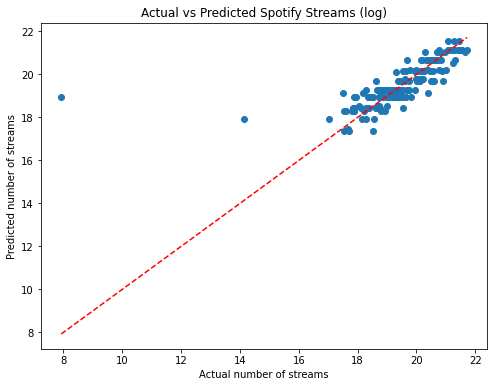

In [23]:
#plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_pred)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--')
plt.xlabel('Actual number of streams')
plt.ylabel('Predicted number of streams')
plt.title('Actual vs Predicted Spotify Streams (log)')
plt.show()

## Interpreting results:
- A mean absolute error of 0.467 and an R-squared of 0.49 indicate that the decision tree shows moderate accuracy in predicting a song's number of streams based on the top 13 features with some room for improvement <br>
- The scatter plot shows most predictions closely align with the dotted line indicating an overall good fit but there are some noteable deviations which suggests the model has difficulty capturing variance for certain songs <br>
- An R-squared score of 0.49 is moderately low and indicates potential underfitting <br>
- **Next steps**: perform a grid search with cross-validation to determine the best hyperparameters to improve the model
